In [ ]:
# from google.colab import files

# # Create a file upload widget
# uploaded = files.upload()

In [ ]:
import os
os.getcwd()


'/content'

In [ ]:
%pwd


'/content'

In [ ]:
# !pip install dlib

In [1]:
# Imports
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import base64
from google.colab import output
from IPython.display import display, Javascript
from math import hypot

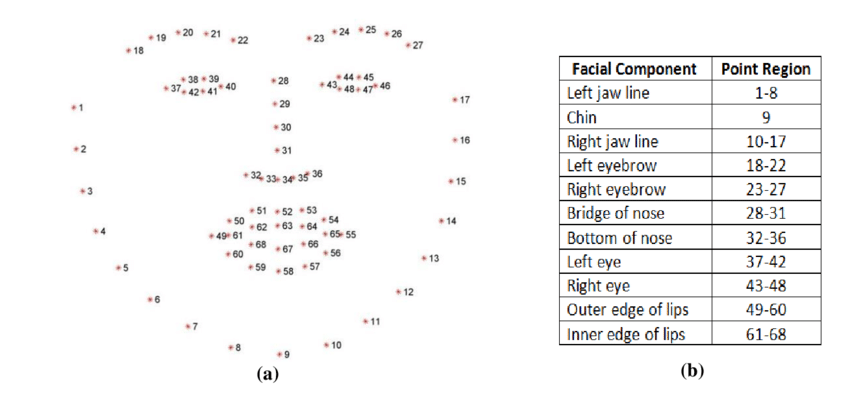

In [ ]:
# Display the image
Image('/content/drive/MyDrive/Colab Notebooks/FYP/img/facial-landmark-points.png')

In [ ]:
cap = cv2.VideoCapture(0)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/FYP/shape_predictor_68_face_landmarks.dat")

while True:
    _, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)



    faces = detector(gray)
    for face in faces:
        # Print array of rectangle coordinates
        # print(face)

        # Display the rectangle (Face detection)
        # x, y = face.left(), face.top()
        # x1, y1 = face.right(), face.bottom()
        # cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)

        # Detect Eyes
        landmarks = predictor(gray, face)

        # Prinnt Eye landmarks point coordinates
        # print(landmarks.part(36))

        # Display Specific landmark point
        x = landmarks.part(36).x
        y = landmarks.part(36).y

        # Mark with red circle that specific point
        cv2.circle(frame, (x, y), 3, (0, 0, 255), 2)


    cv2.imshow('Frame', frame)
    key = cv2.waitKeyy(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

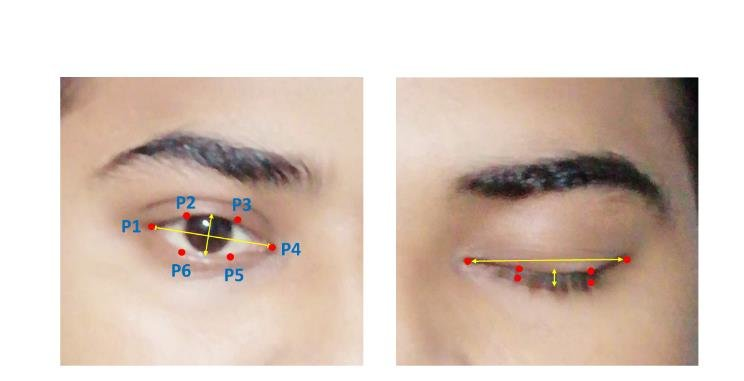

In [ ]:
# Display the image
Image('/content/drive/MyDrive/Colab Notebooks/FYP/img/Facial-Landmark-a-eye-open-b-eye-closed.png')

"""
now we can easily compare a line with coordinates (P1 and P4) with the crossed line, for example, if that second line > 0, the eye is open, else eye is closed.
"""

In [ ]:
cap = cv2.VideoCapture(0)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/FYP/shape_predictor_68_face_landmarks.dat")

while True:
    _, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)



    faces = detector(gray)
    for face in faces:

        # Detect Eyes
        landmarks = predictor(gray, face)

        # Display Line with coords (P1 and P4)
        # P1 coords
        left_point = (landmarks.part(36).x, landmarks.part(36).y)
        # P4 coords
        right_point = (landmarks.part(39).x, landmarks.part(39).y)
        # The line
        horizontal_line = cv2.line(frame, left_point, right_point, (0, 255, 0), 2) # tickness of 2



    cv2.imshow('Frame', frame)
    key = cv2.waitKeyy(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

---
**Next Step:** Draw a perpendicular line to our Horizontal line, the coordinates for the new line will be the length between P6 and P6,  and divided into 2, in other words, a middle between points( P6 and P5 ) is going to be a starting point for perpendicular line and it's will end in the middle between points (P2 and P3).

In [ ]:
cap = cv2.VideoCapture(0)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/FYP/shape_predictor_68_face_landmarks.dat")


# Must be a whole numbers, because working with pixels
def mid_point(p1, p2):
  return int((p1.x + p2.x) / 2), int((p1.y + p2.y) / 2)

while True:
    _, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)



    faces = detector(gray)
    for face in faces:

        # Detect Eyes
        landmarks = predictor(gray, face)

        # Display Horizontal Line with coords (P1 and P4)
        # P1 coords
        left_point = (landmarks.part(36).x, landmarks.part(36).y)
        # P4 coords
        right_point = (landmarks.part(39).x, landmarks.part(39).y)
        # The Horizontal line
        horizontal_line = cv2.line(frame, left_point, right_point, (0, 255, 0), 2) # tickness of 2

        # Display Perpendicular line
        center_top = mid_point(landmarks.part(37), landmarks.part(38))
        center_bottom = mid_point(landmarks.part(41), landmarks.part(40))

        # The Vertical line
        vertical_line = cv2.line(frame, center_top, center_bottom, (0, 255, 0), 2) # tickness of 2





    cv2.imshow('Frame', frame)
    key = cv2.waitKeyy(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [3]:
# JavaScript code to capture webcam stream and send frames to Python
js_code = '''
var video;
video = document.createElement('video');
document.body.appendChild(video);

(async function() {
    const stream = await navigator.mediaDevices.getUserMedia({ 'video': true });
    video.srcObject = stream;
    await video.play();

    google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

    const canvas = document.createElement('canvas');
    canvas.width = video.videoWidth;
    canvas.height = video.videoHeight;
    document.body.appendChild(canvas);

    async function capture() {
        canvas.getContext('2d').drawImage(video, 0, 0);
        return canvas.toDataURL('image/jpeg', 0.8);
    }

    async function loop() {
        while (true) {
            const imgData = await capture();
            google.colab.kernel.invokeFunction('update_frame', [imgData], {});
            await new Promise(resolve => requestAnimationFrame(resolve));
        }
    }

    loop();
})();
'''

In [ ]:
cap = cv2.VideoCapture(0)

# Check if the camera is opened successfully
if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/FYP/shape_predictor_68_face_landmarks.dat")

  def mid_point(p1, p2):
      return int((p1.x + p2.x) / 2), int((p1.y + p2.y) / 2)

  while True:
      ret, frame = cap.read()

      # Check if the frame is empty
      if not ret:
          print("Error: Unable to capture frame from the webcam.")
          break

      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

      faces = detector(gray)
      for face in faces:
          landmarks = predictor(gray, face)
          left_point = (landmarks.part(36).x, landmarks.part(36).y)
          right_point = (landmarks.part(39).x, landmarks.part(39).y)
          horizontal_line = cv2.line(frame, left_point, right_point, (0, 255, 0), 2)

          center_top = mid_point(landmarks.part(37), landmarks.part(38))
          center_bottom = mid_point(landmarks.part(41), landmarks.part(40))
          vertical_line = cv2.line(frame, center_top, center_bottom, (0, 255, 0), 2)

      cv2.imshow('Frame', frame)
      key = cv2.waitKey(1)
      if key == 27:
          break

  cap.release()
  cv2.destroyAllWindows()


Error: Could not open webcam.


<h1>*** Prototyping ***</h1>

<H1>Get Data From Webcam</H1>

In [4]:
def take_photo(quality=0.8):
    display(Javascript('''
        async function takePhoto(quality) {
            const video = document.createElement('video');
            video.style.display = 'none';
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });
            document.body.appendChild(video);
            video.srcObject = stream;
            await video.play();

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            video.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    '''))

    data = output.eval_js('takePhoto({})'.format(quality))
    return data

<H1>Calculate the middle position between two face points</H1>

In [6]:
def mid_point(p1, p2):
    return int((p1.x + p2.x) / 2), int((p1.y + p2.y) / 2)

<H1>Display Vertical and Horizontal line between specific points</H1>

<IPython.core.display.Javascript object>

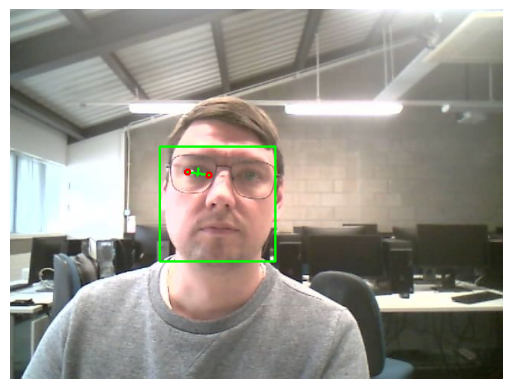

In [11]:
# Capture the photo as a Base64-encoded string
photo_data = take_photo()

# Convert Base64 data to NumPy array
photo_binary = base64.b64decode(photo_data.split(',')[1])
photo_np = np.frombuffer(photo_binary, dtype=np.uint8)
img = cv2.imdecode(photo_np, cv2.IMREAD_COLOR)

# Facial landmark detection using dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/FYP/shape_predictor_68_face_landmarks.dat")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

for face in faces:

    # # Display horizontal line between two points # #
    #
    landmarks = predictor(gray, face)
    left_point = (landmarks.part(36).x, landmarks.part(36).y)
    right_point = (landmarks.part(39).x, landmarks.part(39).y)
    horizontal_line = cv2.line(img, left_point, right_point, (0, 255, 0), 2)


    # # Display a perpendicular line in the middle between two upper and two bottom points # #
    #
    center_top = mid_point(landmarks.part(37), landmarks.part(38))
    center_bottom = mid_point(landmarks.part(41), landmarks.part(40))
    vertical_line = cv2.line(img, center_top, center_bottom, (0, 255, 0), 2)


    # # Display Specific landmark point # #
    #
    # Left Eye Corner
    x36 = landmarks.part(36).x
    y36 = landmarks.part(36).y
    # Right Eye Corner
    x39 = landmarks.part(39).x
    y39 = landmarks.part(39).y
    # Mark with red circle that specific point
    cv2.circle(img, (x36, y36), 3, (0, 0, 255), 2)
    cv2.circle(img, (x39, y39), 3, (0, 0, 255), 2)


    # # Display the rectangle (face detection) # #
    #
    x_rect_top, y_rect_top = face.left(), face.top()
    x_rect_bot, y_rect_bot = face.right(), face.bottom()
    cv2.rectangle(img, (x_rect_top, y_rect_top), (x_rect_bot, y_rect_bot), (0, 255, 0), 2)

# Display the results
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


<h1>Identify and Display the length of the vertical line</h1>

<IPython.core.display.Javascript object>

12.36931687685298


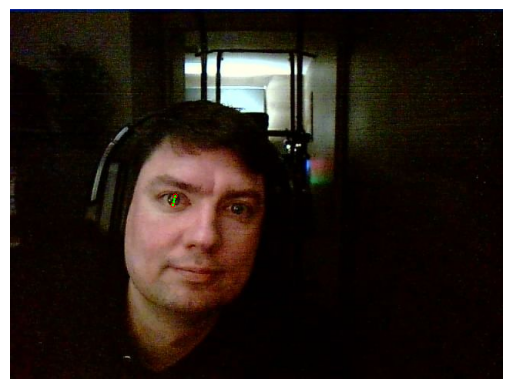

In [ ]:
# Capture the photo as a Base64-encoded string
photo_data = take_photo()

# Convert Base64 data to NumPy array
photo_binary = base64.b64decode(photo_data.split(',')[1])
photo_np = np.frombuffer(photo_binary, dtype=np.uint8)
img = cv2.imdecode(photo_np, cv2.IMREAD_COLOR)

# Facial landmark detection using dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/FYP/shape_predictor_68_face_landmarks.dat")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

for face in faces:

    # # Display horizontal line between two points # #
    #
    landmarks = predictor(gray, face)
    left_point = (landmarks.part(36).x, landmarks.part(36).y)
    right_point = (landmarks.part(39).x, landmarks.part(39).y)
    # horizontal_line = cv2.line(img, left_point, right_point, (0, 255, 0), 2)


    # # Display a perpendicular line in the middle between two upper and two bottom points # #
    #
    center_top = mid_point(landmarks.part(37), landmarks.part(38))
    center_bottom = mid_point(landmarks.part(41), landmarks.part(40))
    vertical_line = cv2.line(img, center_top, center_bottom, (0, 255, 0), 2)


    # # Mark with red circle center_top point and center_bottom point # #
    #
    cv2.circle(img, center_top, 3, (0, 0, 255), 1)
    cv2.circle(img, center_bottom, 3, (0, 0, 255), 1)

    # # Display the lenght of the perpendicular line # #
    #
    vertical_line_lenght = hypot((center_top[0] - center_bottom[0]), (center_top[1] - center_bottom[1]))
    print(vertical_line_lenght)



# Display the results
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<h1>Identify and Display the length of the horizontal line</h1>

<IPython.core.display.Javascript object>

37.107950630558946


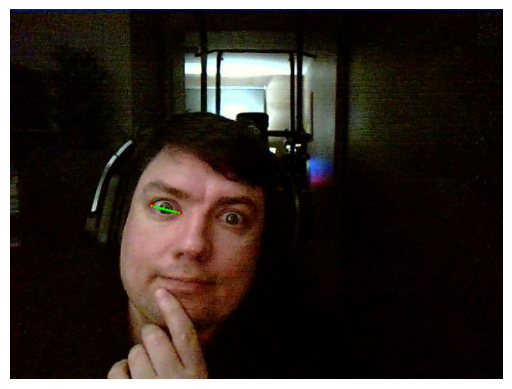

In [ ]:
# Capture the photo as a Base64-encoded string
photo_data = take_photo()

# Convert Base64 data to NumPy array
photo_binary = base64.b64decode(photo_data.split(',')[1])
photo_np = np.frombuffer(photo_binary, dtype=np.uint8)
img = cv2.imdecode(photo_np, cv2.IMREAD_COLOR)

# Facial landmark detection using dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/FYP/shape_predictor_68_face_landmarks.dat")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

for face in faces:

    # # Display horizontal line between two points # #
    #
    landmarks = predictor(gray, face)
    left_point = (landmarks.part(36).x, landmarks.part(36).y)
    right_point = (landmarks.part(39).x, landmarks.part(39).y)
    horizontal_line = cv2.line(img, left_point, right_point, (0, 255, 0), 2)


    # # # Display a perpendicular line in the middle between two upper and two bottom points # #
    # #
    # center_top = mid_point(landmarks.part(37), landmarks.part(38))
    # center_bottom = mid_point(landmarks.part(41), landmarks.part(40))
    # vertical_line = cv2.line(img, center_top, center_bottom, (0, 255, 0), 2)


    # # Display the lenght of the horizontal line # #
    #
    horizontal_line_lenght = hypot((left_point[0] - right_point[0]), (left_point[1] - right_point[1]))
    print(horizontal_line_lenght)


    # # Mark with red circle center_top point and center_bottom point # #
    #
    cv2.circle(img, left_point, 3, (0, 0, 255), 1)
    cv2.circle(img, right_point, 3, (0, 0, 255), 1)


# Display the results
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<h1>Calculate the ratio between the vertical and horizontal lines.</h1>
 <h1>Display the results.</h1>

<IPython.core.display.Javascript object>

Horizontal line lenght:		30.4138126514911
Vertical line lenght:		3.605551275463989
Division:			8.435273922869735


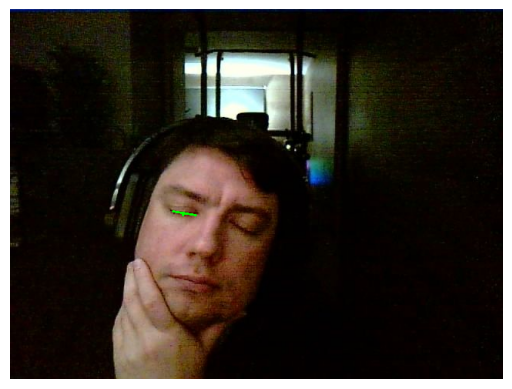

In [ ]:
# Capture the photo as a Base64-encoded string
photo_data = take_photo()

# Convert Base64 data to NumPy array
photo_binary = base64.b64decode(photo_data.split(',')[1])
photo_np = np.frombuffer(photo_binary, dtype=np.uint8)
img = cv2.imdecode(photo_np, cv2.IMREAD_COLOR)

# Facial landmark detection using dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/FYP/shape_predictor_68_face_landmarks.dat")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

for face in faces:

    # # Display horizontal line between two points # #
    #
    landmarks = predictor(gray, face)
    left_point = (landmarks.part(36).x, landmarks.part(36).y)
    right_point = (landmarks.part(39).x, landmarks.part(39).y)
    horizontal_line = cv2.line(img, left_point, right_point, (0, 255, 0), 2)


    # # Display a perpendicular line in the middle between two upper and two bottom points # #
    #
    center_top = mid_point(landmarks.part(37), landmarks.part(38))
    center_bottom = mid_point(landmarks.part(41), landmarks.part(40))
    vertical_line = cv2.line(img, center_top, center_bottom, (0, 255, 0), 2)


    # # Identify the lenght of the horizontal line # #
    #
    horizontal_line_lenght = hypot((left_point[0] - right_point[0]), (left_point[1] - right_point[1]))
    print(f"Horizontal line lenght:\t\t{horizontal_line_lenght}")

    # # Identify the lenght of the vertical line # #
    #
    vertical_line_lenght = hypot((center_top[0] - center_bottom[0]), (center_top[1] - center_bottom[1]))
    print(f"Vertical line lenght:\t\t{vertical_line_lenght}")

    # # Display result of the division # #
    #
    print(f"Division:\t\t\t{horizontal_line_lenght / vertical_line_lenght}")


# Display the results
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<h1>Identify whether the eye is closed or opened</h1>

<IPython.core.display.Javascript object>

Horizontal line lenght:		30.14962686336267
Vertical line lenght:		2.8284271247461903
Division:			10.659502802663921


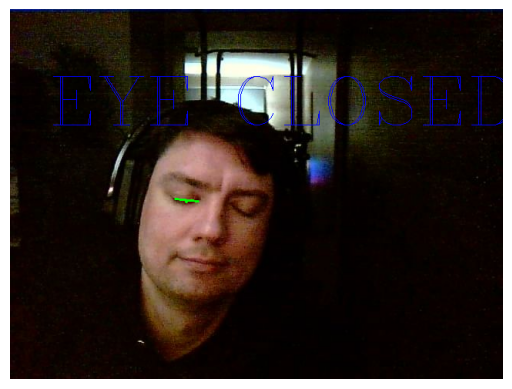

In [ ]:
# Capture the photo as a Base64-encoded string
photo_data = take_photo()

# Convert Base64 data to NumPy array
photo_binary = base64.b64decode(photo_data.split(',')[1])
photo_np = np.frombuffer(photo_binary, dtype=np.uint8)
img = cv2.imdecode(photo_np, cv2.IMREAD_COLOR)

# Facial landmark detection using dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/FYP/shape_predictor_68_face_landmarks.dat")
font = cv2.FONT_HERSHEY_COMPLEX

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

for face in faces:

    # # Display horizontal line between two points # #
    #
    landmarks = predictor(gray, face)
    left_point = (landmarks.part(36).x, landmarks.part(36).y)
    right_point = (landmarks.part(39).x, landmarks.part(39).y)
    horizontal_line = cv2.line(img, left_point, right_point, (0, 255, 0), 2)


    # # Display a perpendicular line in the middle between two upper and two bottom points # #
    #
    center_top = mid_point(landmarks.part(37), landmarks.part(38))
    center_bottom = mid_point(landmarks.part(41), landmarks.part(40))
    vertical_line = cv2.line(img, center_top, center_bottom, (0, 255, 0), 2)


    # # Identify the lenght of the horizontal line # #
    #
    horizontal_line_lenght = hypot((left_point[0] - right_point[0]), (left_point[1] - right_point[1]))
    print(f"Horizontal line lenght:\t\t{horizontal_line_lenght}")

    # # Identify the lenght of the vertical line # #
    #
    vertical_line_lenght = hypot((center_top[0] - center_bottom[0]), (center_top[1] - center_bottom[1]))
    print(f"Vertical line lenght:\t\t{vertical_line_lenght}")

    # # Display result of the division # #
    #
    print(f"Division:\t\t\t{horizontal_line_lenght / vertical_line_lenght}")

    # # Calculate the ratio # #
    #
    ratio = horizontal_line_lenght / vertical_line_lenght

    # # Condition # #
    #
    if ratio > 6:
      cv2.putText(img, "EYE CLOSED", (50, 150), font, 3, (255, 0, 0))
    else:
      cv2.putText(img, "EYE OPEN", (50, 150), font, 3, (255, 0, 0))


# Display the results
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>

Horizontal line lenght:		36.138621999185304
Vertical line lenght:		12.36931687685298
Division:			2.9216344248413937


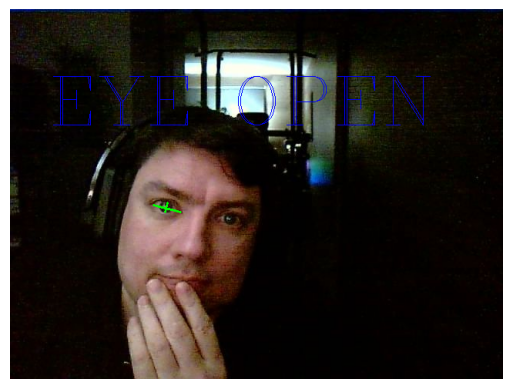

In [ ]:
# Capture the photo as a Base64-encoded string
photo_data = take_photo()

# Convert Base64 data to NumPy array
photo_binary = base64.b64decode(photo_data.split(',')[1])
photo_np = np.frombuffer(photo_binary, dtype=np.uint8)
img = cv2.imdecode(photo_np, cv2.IMREAD_COLOR)

# Facial landmark detection using dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/FYP/shape_predictor_68_face_landmarks.dat")
font = cv2.FONT_HERSHEY_COMPLEX

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

for face in faces:

    # # Display horizontal line between two points # #
    #
    landmarks = predictor(gray, face)
    left_point = (landmarks.part(36).x, landmarks.part(36).y)
    right_point = (landmarks.part(39).x, landmarks.part(39).y)
    horizontal_line = cv2.line(img, left_point, right_point, (0, 255, 0), 2)


    # # Display a perpendicular line in the middle between two upper and two bottom points # #
    #
    center_top = mid_point(landmarks.part(37), landmarks.part(38))
    center_bottom = mid_point(landmarks.part(41), landmarks.part(40))
    vertical_line = cv2.line(img, center_top, center_bottom, (0, 255, 0), 2)


    # # Identify the lenght of the horizontal line # #
    #
    horizontal_line_lenght = hypot((left_point[0] - right_point[0]), (left_point[1] - right_point[1]))
    print(f"Horizontal line lenght:\t\t{horizontal_line_lenght}")

    # # Identify the lenght of the vertical line # #
    #
    vertical_line_lenght = hypot((center_top[0] - center_bottom[0]), (center_top[1] - center_bottom[1]))
    print(f"Vertical line lenght:\t\t{vertical_line_lenght}")

    # # Display result of the division # #
    #
    print(f"Division:\t\t\t{horizontal_line_lenght / vertical_line_lenght}")

    ratio = horizontal_line_lenght / vertical_line_lenght

    if ratio > 6:
      cv2.putText(img, "EYE CLOSED", (50, 150), font, 3, (255, 0, 0))
    else:
      cv2.putText(img, "EYE OPEN", (50, 150), font, 3, (255, 0, 0))


# Display the results
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()